# Какой фреймворк самый лучший

<p style='text-align:right;'>и почему это PyTorch</p>

![](https://cdn-images-1.medium.com/max/2000/1*ZoBwl5bFwjaCnUknYoSHpw.png)

# Тензоры

Многомерные массивы, в которых всё хранится.

In [1]:
import torch

data = [[[1., 2.], [3., 4.]],
          [[5., 6.], [7., 8.]]]
t = torch.tensor(data)
print(t)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


In [2]:
x = torch.tensor([1., 2., 3.])
y = torch.tensor([4., 5., 6.])
z = x + y
print(z)

tensor([5., 7., 9.])


# Автоматическое дифференцирование!

In [11]:
# При создании можно поставить флаг requires_grad
x = torch.tensor([1., 2., 3], requires_grad=True)

# С этим флагом мы можем делать те же операции, что и раньше
y = torch.tensor([4., 5., 6], requires_grad=True)
z = torch.dot(x, y)
print(z)

tensor(32., grad_fn=<DotBackward>)


In [12]:
# НО теперь z кое-что знает о себе
print(z.grad_fn)

In [15]:
z.backward()
print(x.grad())

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

Безграничные возможности для написания моделей!

# Более реальный пример

In [6]:
import matplotlib.pyplot as plt

N, D_in, H, D_out = 200, 30, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

In [12]:
learning_rate = 1e-5
history = []
for t in range(500):
    #                 v Relu
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    #   Linear ^            Linear ^

    loss = (y_pred - y).pow(2).sum()
    history += [loss.item()]
    
    loss.backward()

    with torch.no_grad():
        # ^ Интересно, а зачем это нужно?
        # Двойное дифференцирование.
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Градиенты нужно занулиь обратно
        w1.grad.zero_()
        w2.grad.zero_()

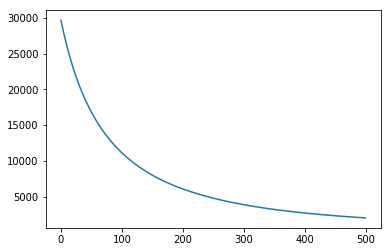

In [13]:
plt.plot(history)
plt.show()

# PyTorch = NumPy + Cuda + SciPy.utils + Autograd

* Реализация всей линейной алгебры
* Десятки популярных слоев
* Параллелизация вычислений на GPU
* Вспомогательные скрипты для работы с датасетами
* Автоматическое дифференцирование (**не нужно знать матан!**)
* Продвинутые оптимизаторы

# Но всё же следует признать...

<center><img width='400px' src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/2000px-TensorFlowLogo.svg.png'></center>

![](https://i.stack.imgur.com/xYybf.png)

<center><img width='400px' src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/08075935/keras-tensorflow-logo.jpg'></center>

In [ ]:
from keras.models import Sequential

model = Sequential([
    Dense(250, input_dim=784, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),
])

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, Y, batch_size=128, nb_epoch=10,
          validation_split=0.2) 

# Так почему же мы на Торче?

Динамические графы:

* Питонично
* Императивно
* $\implies$ Легче дебажить
* $\implies$ Проще для понимания
* Нет ограничений на архитектуры

Статические графы:

* Визуализации
* Возможность компиляции
* $\implies$ оптимизации
* $\implies$ выкатка на сервер
* $\implies$Портирование под что-нибудь, кроме линукса
* Control flow — боль (**нужно извращаться даже чтобы написать `if`!**)

Много кто делает так: разрабатывают и тестируют на динамических графах, а для production переписывают модель на статичесих.

In [ ]:
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

pred = tf.nn.softmax(tf.matmul(x, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        # ...

In [ ]:
# TensorFlow
z = tf.multiply(a, b)
result = tf.cond(x < y, lambda: tf.add(x, z), lambda: tf.square(y))

# PyTorch
z = a * b
if x < y:
    result = x + z
else:
    result = torch.pow(y, 2)

<center><h1>Когда-нибудь споры прекратятся...</h1></center>

<center><img width='200px' src='https://pp.userapi.com/c852216/v852216843/11a4e/hhNhfgyzaw8.jpg'></center>

<center><h1>Давайте покодим</h1></center>

<center>tinkoff-dl/morphing.ipynb</center>